# Data: Titanic - Machine Learning from Disaster

### Link data: https://www.kaggle.com/competitions/titanic/data
| Feature | Description | DType | Variable Type | Comments |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| `Survived` | Passenger survived or not | int64 | Categorical | 0 = No, 1 = Yes |
| `Pclass` | Ticket class | int64 | Categorical | 1 = 1st = Upper, 2 = 2nd = Middle, 3 = 3rd = Lower|
| `Embarked` | Port of Embarkation | object | Categorical | C = Cherbourg, Q = Queenstown, S = Southampton |
| `Sex` | Male, Female | object | Categorical | - |
| `Age` | Age in years | float64 | Numerical | - |
| `SibSp` | # of siblings / spouses aboard the Titanic | int64 | Numerical | - |
| `Parch` | # of parents / spouses aboard the Titanic | int64 | Numerical | - |
| `Fare` | Passenger fare | float64 | Numerical | - |
| `Cabin` | Cabin code | object | Combined | - |
| `Ticket` | Ticket code | object | Combined | - |

# Code

## 1. Import thư viện

In [1]:
import pandas as pd

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 2. Load dữ liệu

In [2]:
# dữ liệu Training
df_train = pd.read_csv("./titanic_train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# dữ liệu Test (chưa gán nhãn)
df_test = pd.read_csv("./titanic_test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# nhãn của bộ Test
df_gender_submission = pd.read_csv("./titanic_gender_submission.csv") 
df_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
# gộp hoàn chỉnh bộ test
df_test = df_test.merge(df_gender_submission, how="left",on="PassengerId")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


## 3. Tiền xử lý dữ liệu

### 3.1 Tổng hợp và loại bỏ những đặc trưng không sử dụng

In [6]:
# Để tiện cho việc xử lí dữ liệu, em sẽ gộp bộ train và bộ test lại làm một và xử lí trên đó. 
# Sau đó, tách ra làm bộ train, test sau
df_data = pd.concat([df_train,df_test])
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# Xóa những đặc trưng không cần thiết
df_data = df_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
# Hiển thị thông tin về bộ dữ liệu
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Cabin     295 non-null    object 
 8   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.3+ KB


In [9]:
# Hiển thị các mô tả dữ liệu trong DataFrame
df_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [10]:
# kiểm tra giá trị Nan trong bộ dữ liệu
df_data.isna().sum()

Survived       0
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### 3.2 Xử lí dữ liệu Nan

* Xử lí dữ liệu Nan cho đặc trưng ***Cabin***

In [11]:
# Đặc trưng Cabin có quá nhiều dữ liệu bị thiếu nên ta sẽ bỏ hẳn đặc trưng này
df_data = df_data.drop(['Cabin'], axis=1)
df_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


* Xử lí dữ liệu Nan cho đặc trưng ***Embarked và Fare***.

In [12]:
# Do cả 2 đặc trưng đều có lượng Nan thấp là 1 và 2 nên ta sẽ trực tiếp loại bỏ các hàng có giá trị Nan ở 2 cột này
df_data = df_data.dropna(subset=['Embarked','Fare'])
df_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


* Xử lí dữ liệu Nan cho đặc trưng ***Age***

In [13]:
# Điền các giá trị còn thiếu ở Age bằng giá trị trung bình theo nhóm Sex và Pclass
# do độ tuổi có thể chịu ảnh hưởng bởi giới tính và tầng lớp sống của họ
by_sex_class = df_data.groupby(['Sex', 'Pclass'])
by_sex_class['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [14]:
def fillna_age(series):
    return series.fillna(series.median())

In [15]:
df_data['Age'] = by_sex_class['Age'].transform(fillna_age)
df_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
413,0,3,male,25.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,25.0,0,0,8.0500,S


In [16]:
# Kiểm tra giá trị Nan lại sau khi xử lí
df_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 3.3 Tạo ra đặc trưng mới

In [17]:
# Ta kết hợp 2 đặc trưng SibSp và Parch lại với nhau và cộng thêm 1 (đại diện cho bản thân) 
# để tạo thành đặc trưng mới là Family_size(số lượng người trong gia đình đi cùng)
df_data['Family_size'] = df_data['SibSp'] + df_data['Parch'] + 1

# xóa các đặc trưng cũ SibSp và Parch
df_data = df_data.drop(['SibSp','Parch'], axis=1)
df_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


# 4. Mã hóa dữ liệu từ chữ sang số

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_data['Sex'] = encoder.fit_transform(df_data['Sex'])
df_data['Embarked'] = encoder.fit_transform(df_data['Embarked'])
df_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,1,22.0,7.2500,2,2
1,1,1,0,38.0,71.2833,0,2
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,2
4,0,3,1,35.0,8.0500,2,1


# 5. Chuẩn hóa dữ liệu

In [19]:
# tách dữ liệu và label
X = df_data.values[:,1:]        #data
y = df_data['Survived'].values  #label

print(X.shape, y.shape)
X[:2], y[:2]

(1306, 6) (1306,)


(array([[ 3.    ,  1.    , 22.    ,  7.25  ,  2.    ,  2.    ],
        [ 1.    ,  0.    , 38.    , 71.2833,  0.    ,  2.    ]]),
 array([0, 1], dtype=int64))

In [20]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[:2]

array([[ 0.84099663,  0.74234014, -0.54679785, -0.50194941,  0.62327089,
         0.07201288],
       [-1.54930064, -1.34709137,  0.66876481,  0.73550078, -1.83220961,
         0.07201288]])

# 6. Chia dữ liệu train, test theo tỉ lệ 7:3

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape  = ', X_test.shape)
print('X_test.shape  = ', y_test.shape)

X_train.shape =  (914, 6)
y_train.shape =  (914,)
X_test.shape  =  (392, 6)
X_test.shape  =  (392,)


# 7. Xây dựng, huấn luyện model và đánh giá model

In [22]:
models = {
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=3),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier(),
}

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_fscore_support

def evaluate_model(model):
    start = time.time()                 # thời gian bắt đầu
    y_pred = model.predict(X_test)      # dự đoán
    time_test = time.time() - start     # tính thời gian quá trình dự đoán

    accuracy = accuracy_score(y_test, y_pred)
    precision_class, recall_class, f1_class, _ = precision_recall_fscore_support(y_test, y_pred)
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    print(classification_report(y_test, y_pred))
    
    return (time_test, accuracy, 
            precision_class[0], precision_class[1], precision_weighted, 
            recall_class[0], recall_class[1], recall_weighted, 
            f1_class[0], f1_class[1], f1_weighted)

In [24]:
import time
compare = {}
for name, model in models.items():
    print(f'Model {name}')
    # training
    start = time.time()
    model.fit(X_train, y_train)
    time_train = time.time() - start

    # testing
    time_test, accuracy, precision_0, precision_1, precision_weighted, recall_0, recall_1, recall_weighted, f1_0, f1_1, f1_weighted = evaluate_model(model)

    # save compare
    compare[name] = {
        'time_train': time_train,
        'time_test': time_test,
        'accuracy': accuracy,
        'precision_0': precision_0,
        'precision_1': precision_1,
        'precision_weighted': precision_weighted,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'recall_weighted': recall_weighted,
        'f1_0': f1_0,
        'f1_1': f1_1,
        'f1_weighted': f1_weighted,
        }
    print('-'*75)

Model SVC
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       240
           1       0.88      0.79      0.83       152

    accuracy                           0.88       392
   macro avg       0.88      0.86      0.87       392
weighted avg       0.88      0.88      0.88       392

---------------------------------------------------------------------------
Model GaussianNB
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       240
           1       0.79      0.80      0.79       152

    accuracy                           0.84       392
   macro avg       0.83      0.83      0.83       392
weighted avg       0.84      0.84      0.84       392

---------------------------------------------------------------------------
Model LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       240
           1       0.84      0.77

# 8. So sánh các model

In [25]:
# chuyển dict ở trên thành DataFrame để tiện xử lí
df_compare = pd.DataFrame(compare).T
df_compare

,time_train,time_test,accuracy,precision_0,precision_1,precision_weighted,recall_0,recall_1,recall_weighted,f1_0,f1_1,f1_weighted
SVC,0.061995,0.053003,0.877551,0.875000,0.882353,0.877851,0.933333,0.789474,0.877551,0.903226,0.833333,0.876125
GaussianNB,0.002000,0.000999,0.839286,0.870293,0.790850,0.839488,0.866667,0.796053,0.839286,0.868476,0.793443,0.839381
LogisticRegression,0.019999,0.000000,0.854592,0.861660,0.841727,0.853931,0.908333,0.769737,0.854592,0.884381,0.804124,0.853261
KNeighborsClassifier,0.004997,0.076001,0.846939,0.854331,0.833333,0.846189,0.904167,0.756579,0.846939,0.878543,0.793103,0.845413
DecisionTreeClassifier,0.013002,0.000997,0.826531,0.844000,0.795775,0.825300,0.879167,0.743421,0.826531,0.861224,0.768707,0.825351
RandomForestClassifier,0.432995,0.022999,0.836735,0.846457,0.818841,0.835748,0.895833,0.743421,0.836735,0.870445,0.779310,0.835107
GradientBoostingClassifier,0.670004,0.001997,0.859694,0.865613,0.848921,0.859140,0.912500,0.776316,0.859694,0.888438,0.810997,0.858410
XGBClassifier,0.447020,0.005978,0.818878,0.833992,0.791367,0.817464,0.879167,0.723684,0.818878,0.855984,0.756014,0.817220
LGBMClassifier,0.183999,0.006009,0.846939,0.851562,0.838235,0.846395,0.908333,0.750000,0.846939,0.879032,0.791667,0.845156


In [26]:
# hightight những kết quả nổi bật
# màu xanh đối với max và đỏ đối với min
df_compare.style.highlight_max(color = 'green', axis = 0, subset=['accuracy', 'precision_0', 'precision_1', 'precision_weighted', 'recall_0', 'recall_1', 'recall_weighted', 'f1_0', 'f1_1', 'f1_weighted']
                ).highlight_min(color = 'red', axis = 0, subset=['time_train', 'time_test'])

# ở đây ta thấy ở time_test có giá trị nhỏ nhất là 0.000000 nhưng thực tế không phải vậy. 
# Điều này xảy ra là do tốc độ dự đoán của các mô hình này rất nhanh nên khi làm tròn số đã cắt mất

,time_train,time_test,accuracy,precision_0,precision_1,precision_weighted,recall_0,recall_1,recall_weighted,f1_0,f1_1,f1_weighted
SVC,0.061995,0.053003,0.877551,0.875000,0.882353,0.877851,0.933333,0.789474,0.877551,0.903226,0.833333,0.876125
GaussianNB,0.002000,0.000999,0.839286,0.870293,0.790850,0.839488,0.866667,0.796053,0.839286,0.868476,0.793443,0.839381
LogisticRegression,0.019999,0.000000,0.854592,0.861660,0.841727,0.853931,0.908333,0.769737,0.854592,0.884381,0.804124,0.853261
KNeighborsClassifier,0.004997,0.076001,0.846939,0.854331,0.833333,0.846189,0.904167,0.756579,0.846939,0.878543,0.793103,0.845413
DecisionTreeClassifier,0.013002,0.000997,0.826531,0.844000,0.795775,0.825300,0.879167,0.743421,0.826531,0.861224,0.768707,0.825351
RandomForestClassifier,0.432995,0.022999,0.836735,0.846457,0.818841,0.835748,0.895833,0.743421,0.836735,0.870445,0.779310,0.835107
GradientBoostingClassifier,0.670004,0.001997,0.859694,0.865613,0.848921,0.859140,0.912500,0.776316,0.859694,0.888438,0.810997,0.858410
XGBClassifier,0.447020,0.005978,0.818878,0.833992,0.791367,0.817464,0.879167,0.723684,0.818878,0.855984,0.756014,0.817220
LGBMClassifier,0.183999,0.006009,0.846939,0.851562,0.838235,0.846395,0.908333,0.750000,0.846939,0.879032,0.791667,0.845156


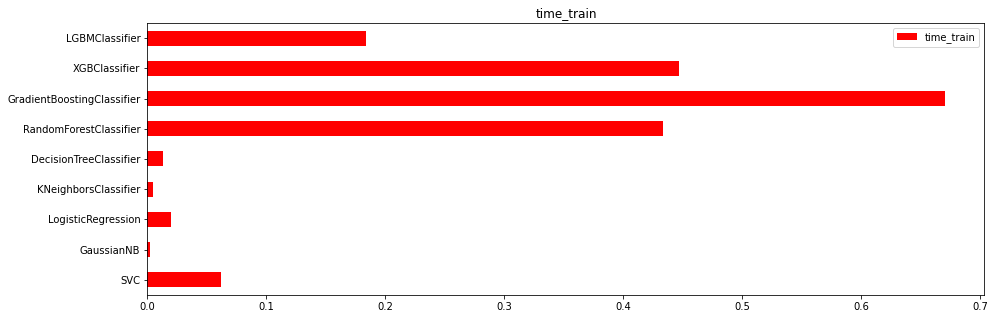

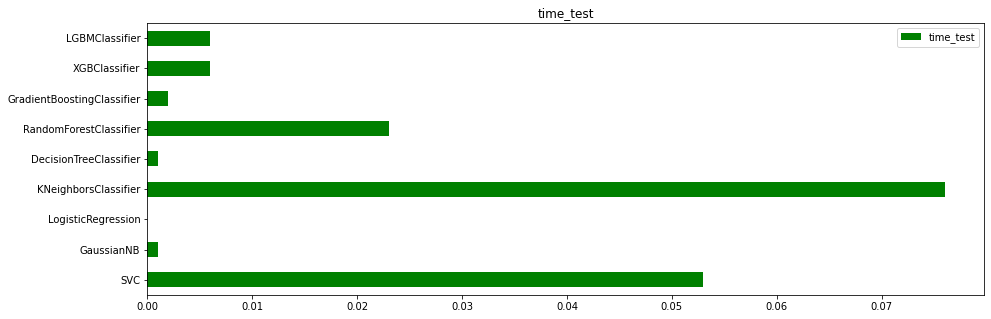

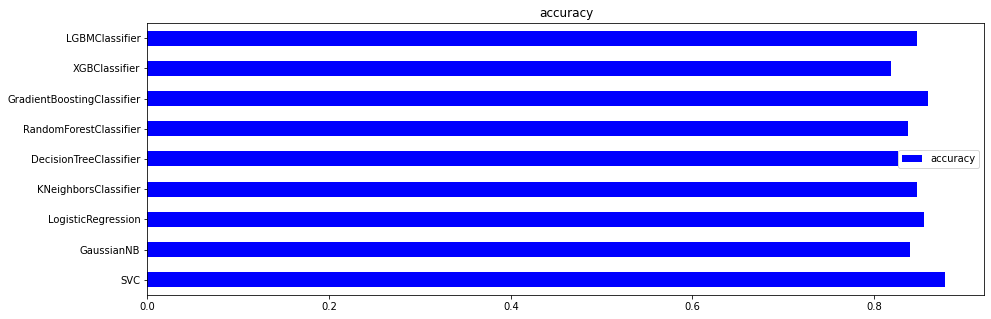

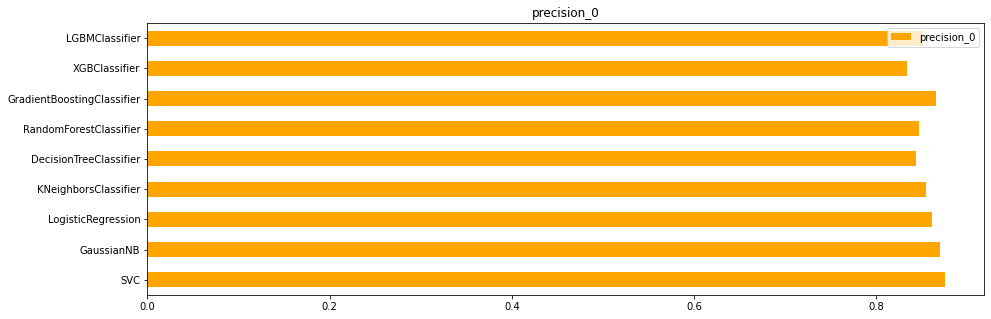

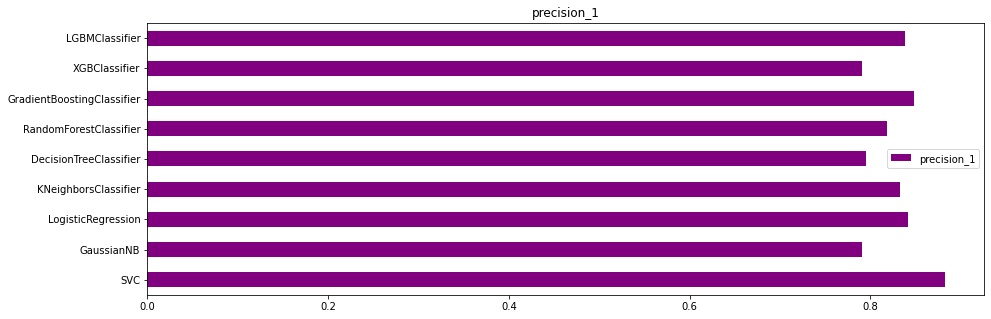

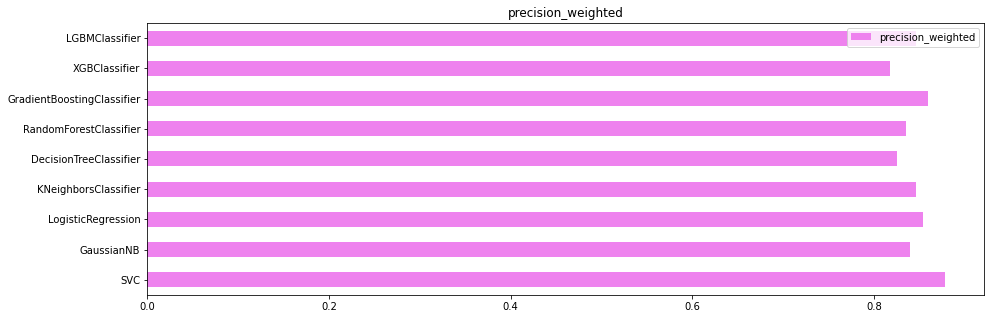

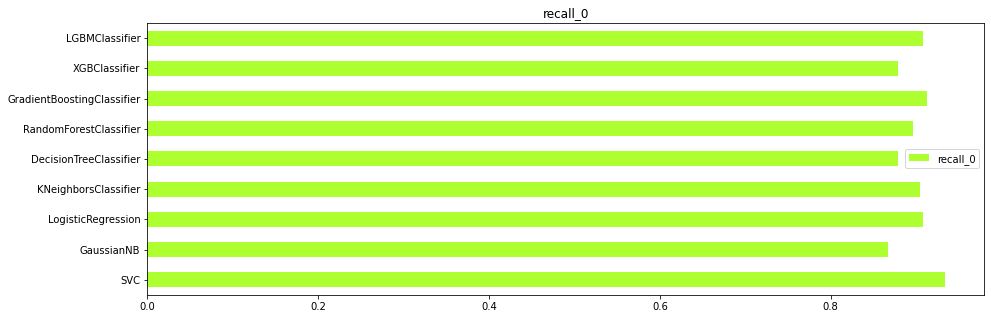

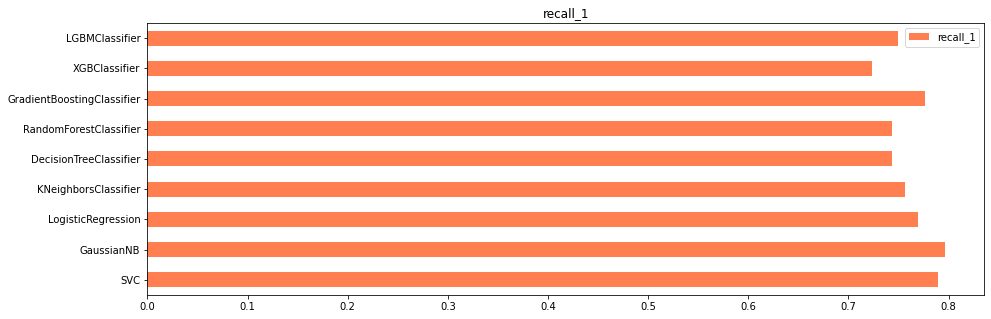

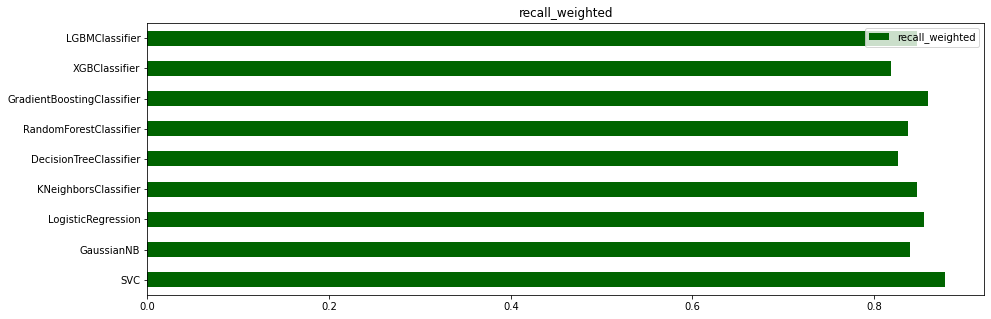

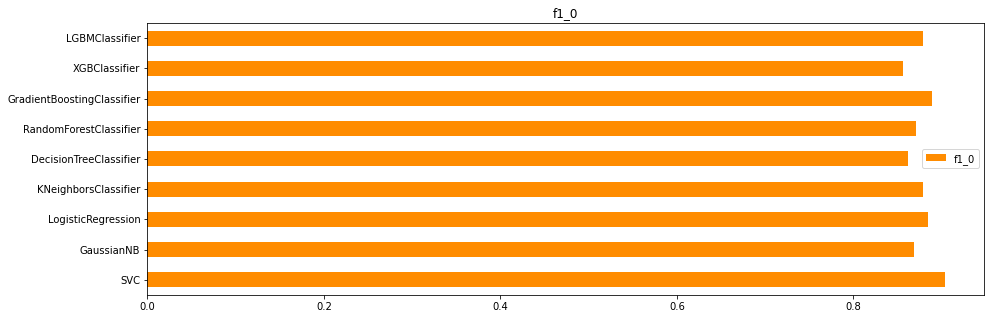

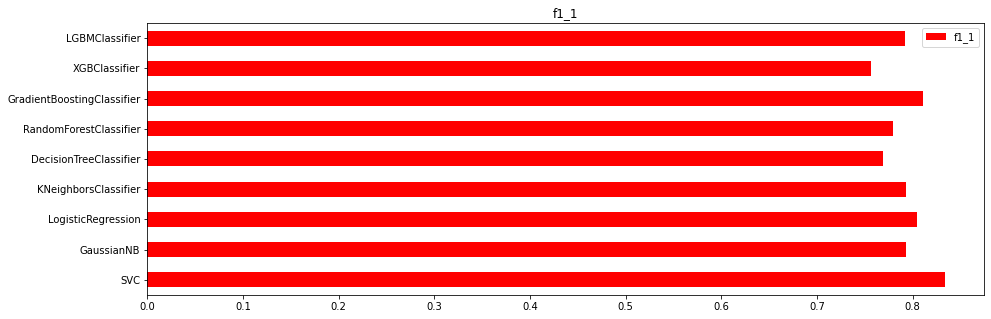

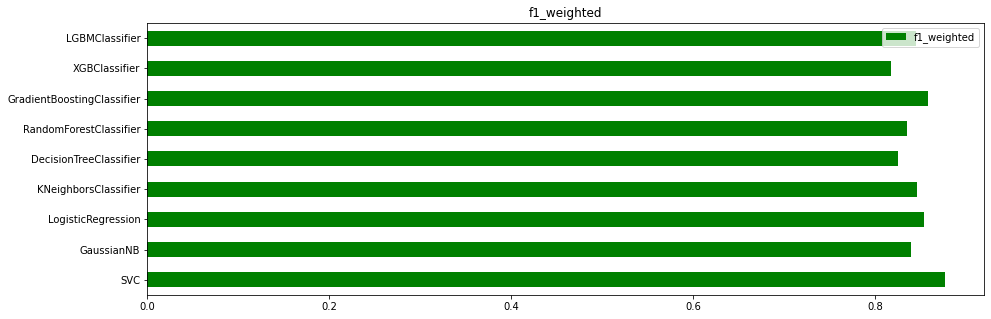

In [27]:
# vẽ biểu đồ so sánh các độ đo giữa các model với nhau
colors = ['red', 'green', 'blue', 'orange', 'purple', 'violet', 'greenyellow', 'coral', 'darkgreen', 'darkorange', 'red', 'green', 'blue']
for i, col in enumerate(df_compare.columns):
    df_compare.plot(kind= 'barh', y=col, figsize=(15,5), color=colors[i], title=col)

<AxesSubplot:>

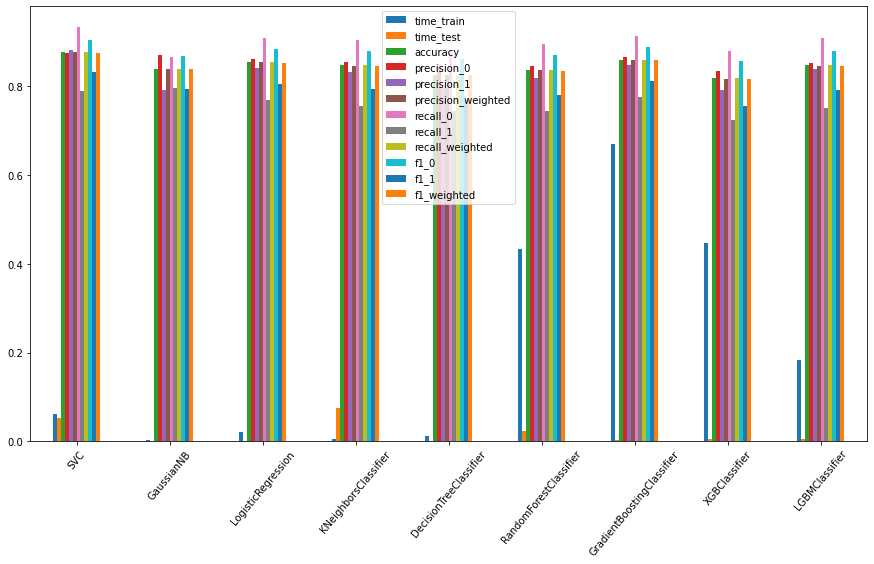

In [28]:
# vẽ chung các độ đo trong cùng 1 biểu đồ
df_compare.plot(kind= 'bar', figsize=(15,8), rot=50)